### Google 드라이브 마운트하기

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 데이터 탐색과 시각화를 위한 라이브러리 설정

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터셋 구성 설명 (각 컬럼 속성, 결측값, 이상치, 통계적 특성 등)

### 데이터 가져오기

In [36]:
# 데이터프레임을 표시할 때 최대 100개의 열까지 표시하도록 설정
pd.set_option('display.max_columns', 100)

In [37]:
employee_data = pd.read_csv("/content/drive/MyDrive/인공지능공학_Project/IBM HR Attrition Data.csv")
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### 각 컬럼 속성 확인

In [38]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### 결측값 확인

In [67]:
employee_data.isnull().sum().sum()

0

#### 각칼람의 정보

1. Age: 직원의 나이.
2. Attrition: 직원의 이직 여부('Yes', 'No').
3. BusinessTravel: 업무 출장을 다니는 빈도.(가끔: 'Travel_Rarely', 자주: 'Travel_Frequently', 'Non-Travel')
4. DailyRate: 일급.
5. Department: 소속 부서('Sales', 'Research & Development', 'Human Resources').
6. DistanceFromHome: 자택에서 직장까지의 거리.
7. Education: 교육 수준(1부터 5까지의 척도).
    - 1: Below College
    - 2: College
    - 3: Bachelor
    - 4: Master
    - 5: Doctor
8. EducationField: 학력 분야('Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources').
9. EmployeeCount: 직원 총 수(항상 1의 값을 가지므로 특별한 의미는 없음).
10. EmployeeNumber: 직원 식별 번호.
11. EnvironmentSatisfaction: 환경 만족도(1부터 4까지의 척도).
    - 1: Low
    - 2: Medium
    - 3: High
    - 4: Very High
12. Gender: 직원의 성별('Female', 'Male’).
13. HourlyRate: 시급.
14. JobInvolvement: 직무 참여도(1부터 4까지의 척도).
    - 1: Low
    - 2: Medium
    - 3: High
    - 4: Very High
15. JobLevel: 직급 수준(1부터 5까지의 척도).
16. JobRole: 직무 역할('Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources’).
17. JobSatisfaction: 직무 만족도(1부터 4까지의 척도).
    - 1: Low
    - 2: Medium
    - 3: High
    - 4: Very High
18. MaritalStatus: 혼인 상태('Single', 'Married', 'Divorced').
19. MonthlyIncome: 월 수입.
20. MonthlyRate: 월급.
21. NumCompaniesWorked: 근무한 회사의 수.
22. Over18: 18세 이상인지 여부(모두 ‘Y’).
23. OverTime: 잔업 여부('Yes', 'No').
24. PercentSalaryHike: 급여 인상률.
25. PerformanceRating: 성과 평가(수치로 표현).
26. RelationshipSatisfaction: 인간관계 만족도(1부터 4까지의 척도)
    - 1: Low
    - 2: Medium
    - 3: High
    - 4: Very High
27. StandardHours: 표준 근무 시간(모두 80).
28. StockOptionLevel: 스톡 옵션 수준(0부터 3까지의 척도).
29. TotalWorkingYears: 총 근무 연수.
30. TrainingTimesLastYear: 지난 해 교육 횟수.
31. WorkLifeBalance: 워크 라이프 밸런스 평가(1부터 4까지의 척도).
    - 1: Bad
    - 2: Good
    - 3: Better
    - 4: Best
32. YearsAtCompany: 현재 회사에서의 근무 연수.
33. YearsInCurrentRole: 현재 직무에서의 근무 연수.
34. YearsSinceLastPromotion: 마지막 승진 이후의 연수.
35. YearsWithCurrManager: 현재 매니저와 함께 일한 연수.

###이상치

In [40]:
# 기초 통계정보 확인하기
employee_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [41]:
# 범주형 변수컬럼의 기초 통계정보 확인하기
employee_data.describe(exclude="number")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


*   Attrition: "No"의 수가 많아(1233건), 전체 직원의 약 16%가 퇴사한 것으로 나타났다.
*   BusinessTravel: "Travel_Rarely"가 1043건으로 많아, 직원들은 출장을 자주 가지 않는 경향이 있다.
*   Department: "Research & Development" 부서가 961건으로 가장 많아, R&D 부서에 직원들이 집중되고 있다.
*   EducationField: "Life Sciences"가 606건으로 가장 많아, 교육 분야의 편향이 보인다.
*   MaritalStatus: 결혼한 직원이 673건으로 많아, 가정 환경의 영향이 고려될 수 있다.
*   OverTime: "No"가 1054건으로 많아, 잔업을 하지 않는 직원이 많다.

In [42]:
# EmployeeCount, Over18, StandardHours는 분석에 불필요　때문에 컬럼 삭제
employee_data = employee_data.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'])

In [43]:
# 컬럼 삭제 되었는지　컬럼 수 확인
employee_data.shape

(1470, 32)

In [44]:
# 평균값과 표준편차를 보고 평균과 차이가 큰 최대값과 최소값을 가진 컬럼 뽑기
employee_data[["MonthlyIncome", "TotalWorkingYears", "YearsAtCompany"]].describe()

,MonthlyIncome,TotalWorkingYears,YearsAtCompany
count,1470.000000,1470.000000,1470.000000
mean,6502.931293,11.279592,7.008163
std,4707.956783,7.780782,6.126525
min,1009.000000,0.000000,0.000000
25%,2911.000000,6.000000,3.000000
50%,4919.000000,10.000000,5.000000
75%,8379.000000,15.000000,9.000000
max,19999.000000,40.000000,40.000000


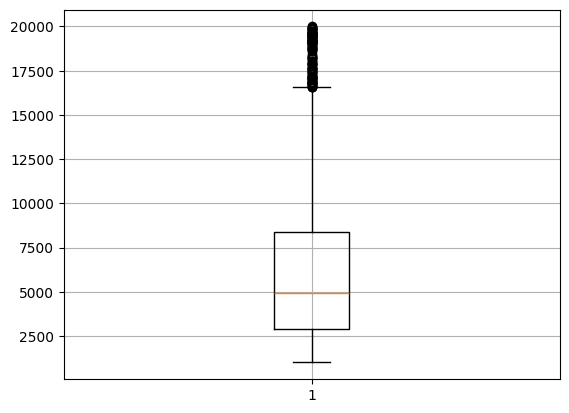

In [45]:
# MonthlyIncome 시각화
plt.boxplot(employee_data["MonthlyIncome"])
plt.grid()

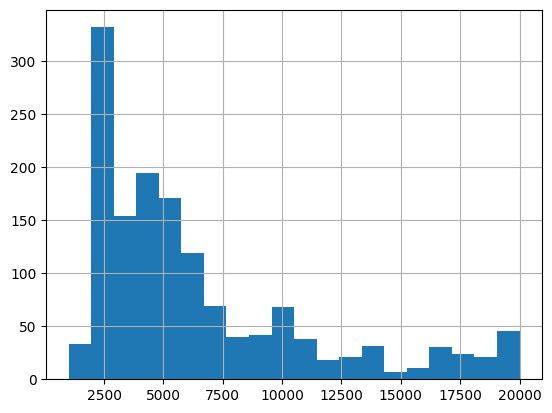

In [46]:
plt.hist(employee_data["MonthlyIncome"], bins=20)
plt.grid()

↑두가지 그래프에서 데이터 전체 분포 내에 속해 있고 자연스러운 변동 범위로 간주될 수 있기 때문에 특별한 처리가 필요하지 않다고 판단

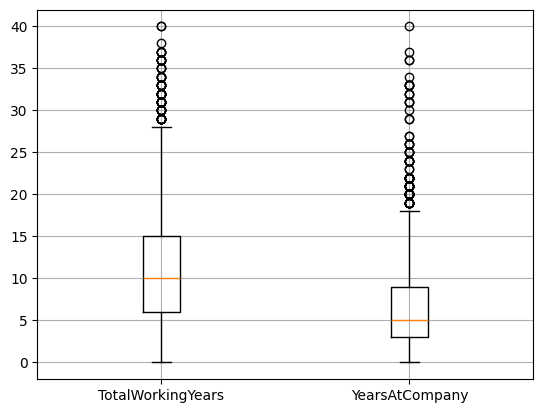

In [47]:
# TotalWorkingYears, YearsAtCompany 시각화
plt.boxplot(employee_data[["TotalWorkingYears", "YearsAtCompany"]],
            labels=["TotalWorkingYears", "YearsAtCompany"])
plt.grid()

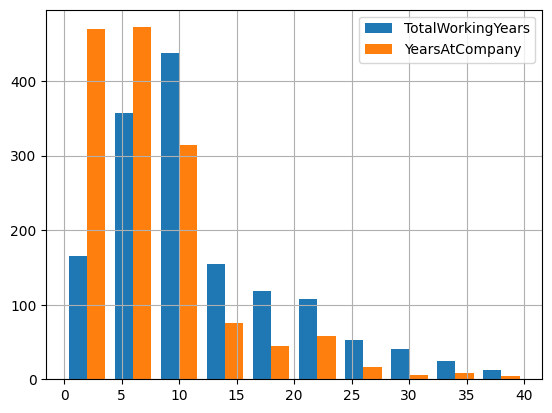

In [48]:
plt.hist(employee_data[["TotalWorkingYears", "YearsAtCompany"]],
         label=["TotalWorkingYears", "YearsAtCompany"])
plt.grid()
plt.legend()

↑두가지 그래프에서 데이터 전체 분포 내에 속해 있고 자연스러운 변동 범위로 간주될 수 있기 때문에 특별한 처리가 필요하지 않다고 판단

### 통계적 특성

#### 카테고리 수가 적은 칼럼 Attrition, BusinessTravel, Department, Education, EnvironmentSatisfaction, Gender, JobInvolvement, JobSatisfaction, MaritalStatus, OverTime, RelationshipSatisfaction, WorkLifeBalance 파이 차트 그리기

Text(0.5, 1.0, 'Attrition Distribution')

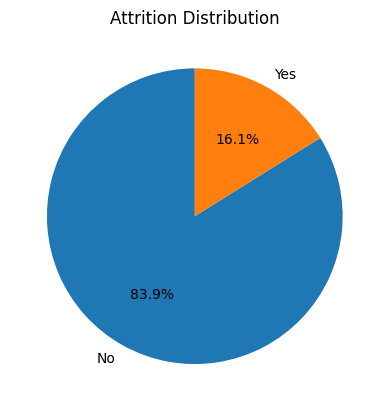

In [49]:
# Attrition 파이 차트 그리기

# 카테고리별 개수 추출
attrition_counts = employee_data['Attrition'].value_counts()

# 파이 차트 작성
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Attrition Distribution')



Text(0.5, 1.0, 'BusinessTravel Distribution')

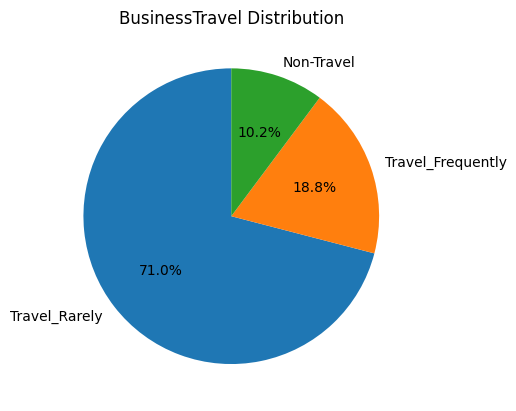

In [50]:
# BusinessTravel 파이 차트 그리기

# 카테고리별 개수 추출
BusinessTravel_counts = employee_data['BusinessTravel'].value_counts()

# 파이 차트 작성
plt.pie(BusinessTravel_counts, labels=BusinessTravel_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('BusinessTravel Distribution')

Text(0.5, 1.0, 'Department Distribution')

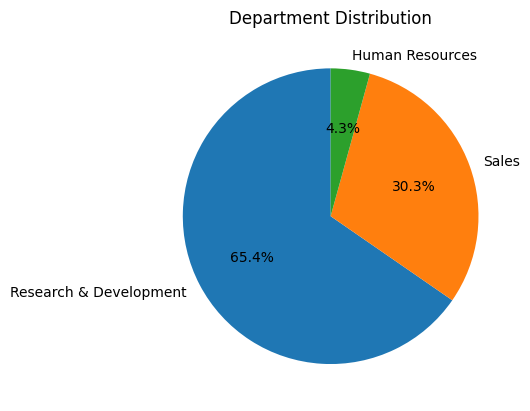

In [51]:
# Department 파이 차트 그리기

# 카테고리별 개수 추출
Department_counts = employee_data['Department'].value_counts()

# 파이 차트 작성
plt.pie(Department_counts, labels=Department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Department Distribution')

Text(0.5, 1.0, 'Education Distribution')

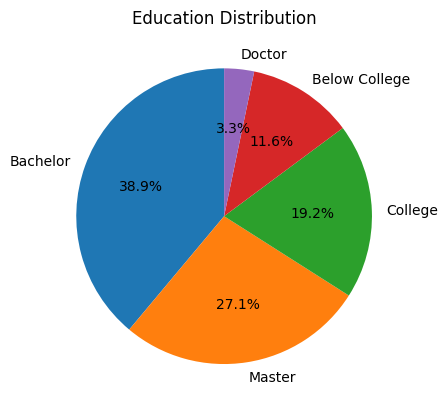

In [52]:
# Education 파이 차트 그리기

# 레이블 정의
Education_label = {
    1: "Below College",
    2: "College",
    3: "Bachelor",
    4: "Master",
    5: "Doctor"
}

# Education 데이터를 레이블로 변환
Education_data = employee_data["Education"].map(Education_label)

# 카테고리별 개수 추출
Education_counts = Education_data.value_counts()

# 파이 차트 작성
plt.pie(Education_counts, labels=Education_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Education Distribution')

Text(0.5, 1.0, 'EnvironmentSatisfaction Distribution')

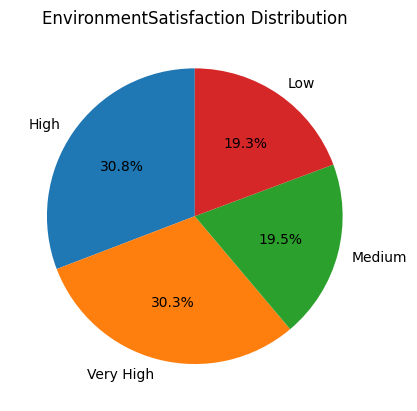

In [53]:
# EnvironmentSatisfaction 파이 차트 그리기

# 레이블 정의
EnvironmentSatisfaction_label = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}

# EnvironmentSatisfaction 데이터를 레이블로 변환
EnvironmentSatisfaction_data = employee_data["EnvironmentSatisfaction"].map(EnvironmentSatisfaction_label)

# 카테고리별 개수 추출
EnvironmentSatisfaction_counts = EnvironmentSatisfaction_data.value_counts()

# 파이 차트 작성
plt.pie(EnvironmentSatisfaction_counts, labels=EnvironmentSatisfaction_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('EnvironmentSatisfaction Distribution')

Text(0.5, 1.0, 'Gender Distribution')

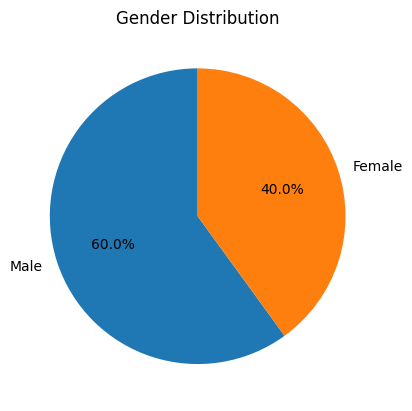

In [54]:
# Gender 파이 차트 그리기

# 카테고리별 개수 추출
Gender_counts = employee_data['Gender'].value_counts()

# 파이 차트 작성
plt.pie(Gender_counts, labels=Gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

Text(0.5, 1.0, 'JobInvolvement Distribution')

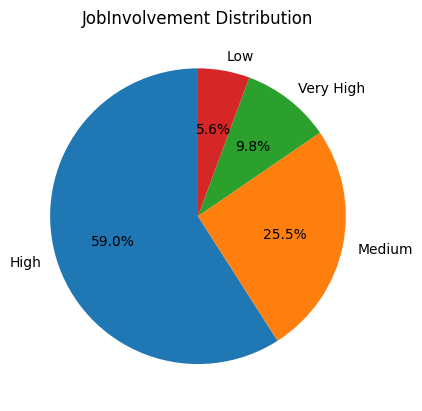

In [55]:
# JobInvolvement 파이 차트 그리기

# 레이블 정의
JobInvolvement_label = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}

# JobInvolvement 데이터를 레이블로 변환
JobInvolvement_data = employee_data["JobInvolvement"].map(JobInvolvement_label)

# 카테고리별 개수 추출
JobInvolvement_counts = JobInvolvement_data.value_counts()

# 파이 차트 작성
plt.pie(JobInvolvement_counts, labels=JobInvolvement_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('JobInvolvement Distribution')

Text(0.5, 1.0, 'JobSatisfaction Distribution')

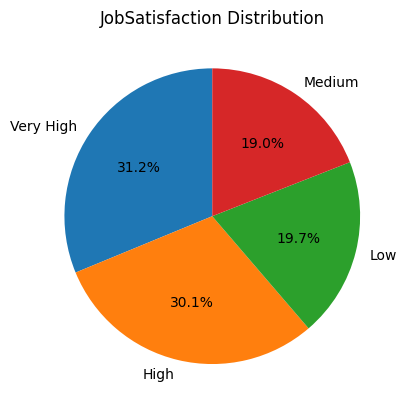

In [56]:
# JobSatisfaction 파이 차트 그리기

# 레이블 정의
JobSatisfaction_label = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}

# JobSatisfaction 데이터를 레이블로 변환
JobSatisfaction_data = employee_data["JobSatisfaction"].map(JobSatisfaction_label)

# 카테고리별 개수 추출
JobSatisfaction_counts = JobSatisfaction_data.value_counts()

# 파이 차트 작성
plt.pie(JobSatisfaction_counts, labels=JobSatisfaction_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('JobSatisfaction Distribution')

Text(0.5, 1.0, 'MaritalStatus Distribution')

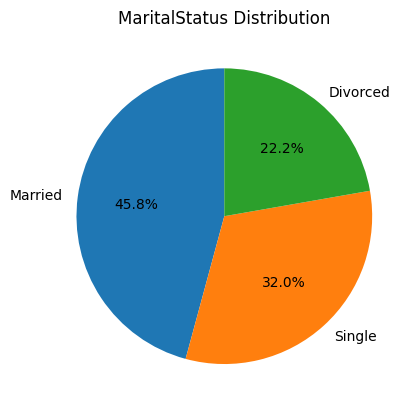

In [57]:
# MaritalStatus 파이 차트 그리기

# 카테고리별 개수 추출
MaritalStatus_counts = employee_data['MaritalStatus'].value_counts()

# 파이 차트 작성
plt.pie(MaritalStatus_counts, labels=MaritalStatus_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('MaritalStatus Distribution')

Text(0.5, 1.0, 'OverTime Distribution')

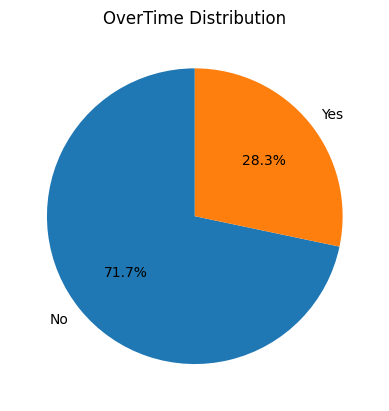

In [58]:
# OverTime 파이 차트 그리기

# 카테고리별 개수 추출
OverTime_counts = employee_data['OverTime'].value_counts()

# 파이 차트 작성
plt.pie(OverTime_counts, labels=OverTime_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('OverTime Distribution')

Text(0.5, 1.0, 'RelationshipSatisfaction Distribution')

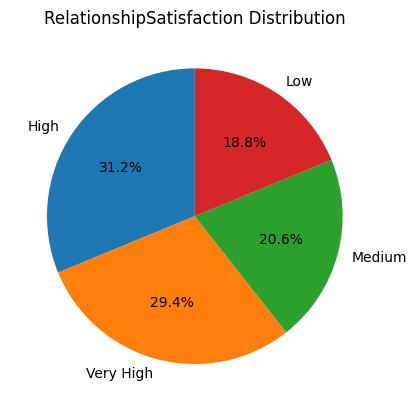

In [59]:
# RelationshipSatisfaction 파이 차트 그리기

# 레이블 정의
RelationshipSatisfaction_label = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}

# RelationshipSatisfaction 데이터를 레이블로 변환
RelationshipSatisfaction_data = employee_data["RelationshipSatisfaction"].map(RelationshipSatisfaction_label)

# 카테고리별 개수 추출
RelationshipSatisfaction_counts = RelationshipSatisfaction_data.value_counts()

# 파이 차트 작성
plt.pie(RelationshipSatisfaction_counts, labels=RelationshipSatisfaction_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('RelationshipSatisfaction Distribution')

Text(0.5, 1.0, 'WorkLifeBalance Distribution')

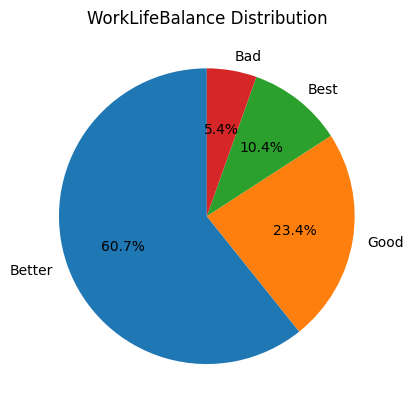

In [60]:
# WorkLifeBalance 파이 차트 그리기

# 레이블 정의
WorkLifeBalance_label = {
    1: "Bad",
    2: "Good",
    3: "Better",
    4: "Best"
}

# WorkLifeBalance 데이터를 레이블로 변환
WorkLifeBalance_data = employee_data["WorkLifeBalance"].map(WorkLifeBalance_label)

# 카테고리별 개수 추출
WorkLifeBalance_counts = WorkLifeBalance_data.value_counts()

# 파이 차트 작성
plt.pie(WorkLifeBalance_counts, labels=WorkLifeBalance_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('WorkLifeBalance Distribution')

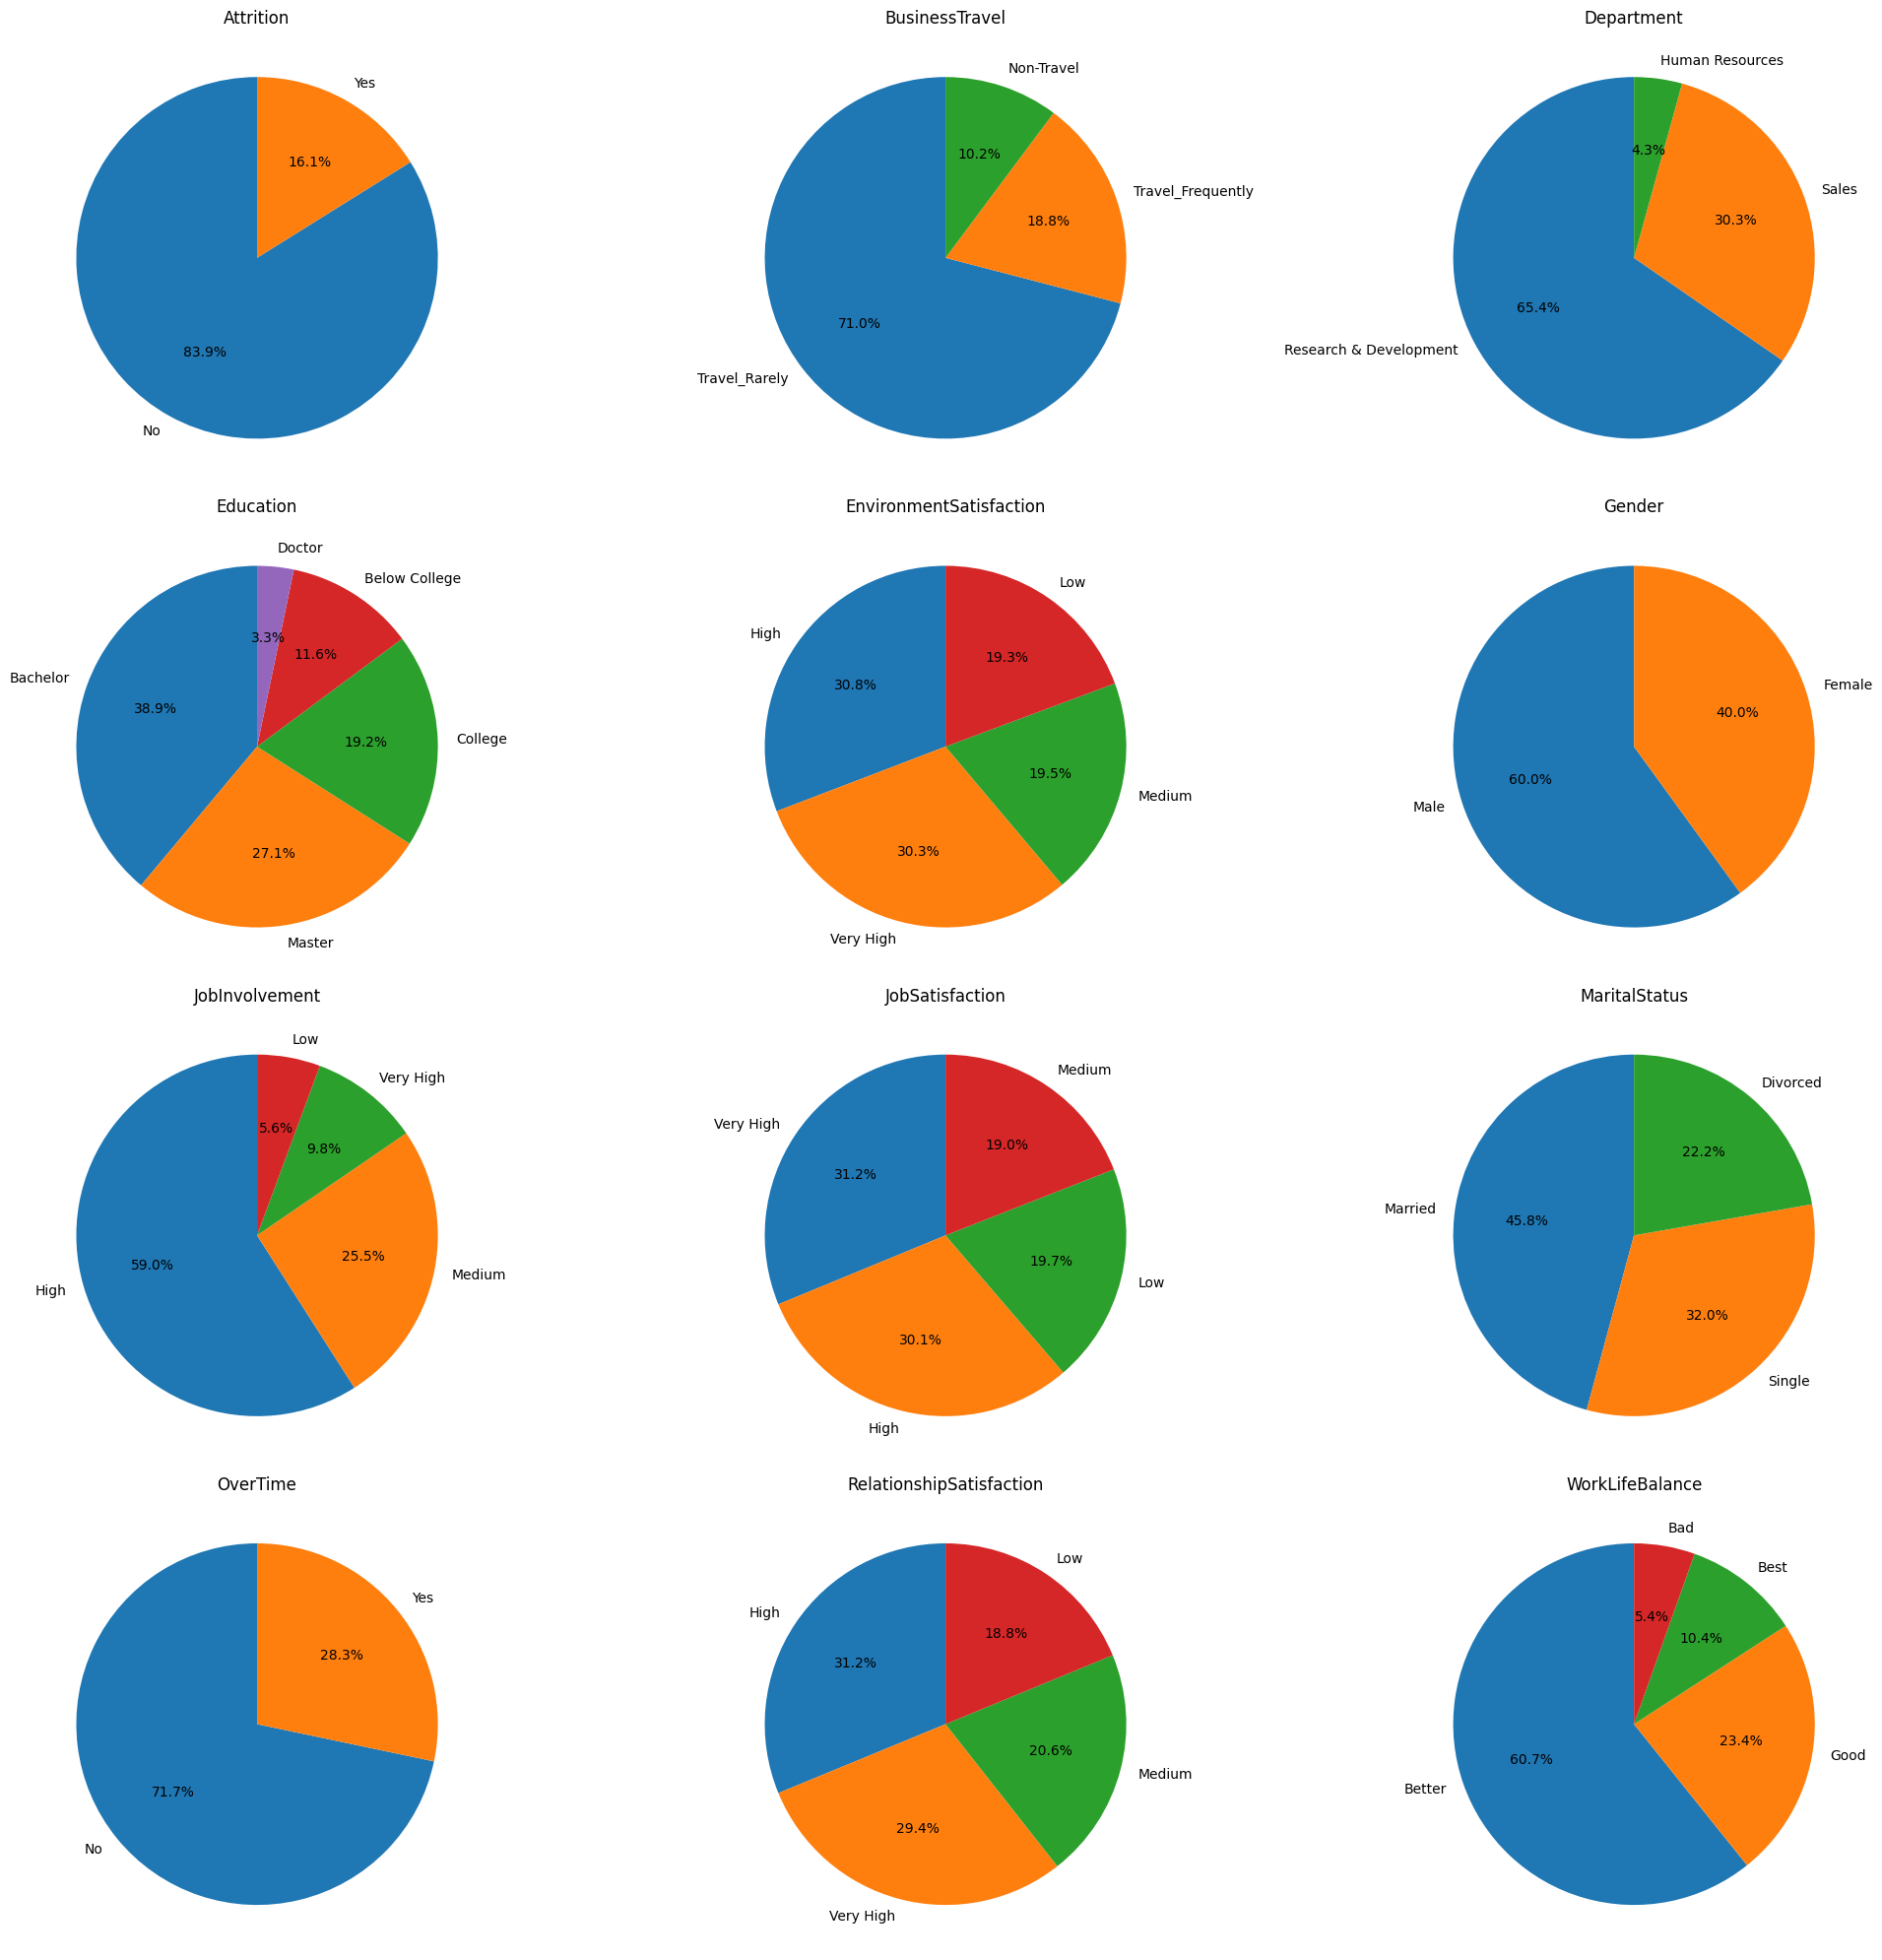

In [61]:
# 레이블 정의
Education_label = {
    1: "Below College",
    2: "College",
    3: "Bachelor",
    4: "Master",
    5: "Doctor"
}
Low_High_label = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}
Bat_Good_label = {
    1: "Bad",
    2: "Good",
    3: "Better",
    4: "Best"
}

# 레이블 변환
employee_data_mapped = employee_data.copy()
employee_data_mapped["Education"] = employee_data["Education"].map(Education_label)
employee_data_mapped["EnvironmentSatisfaction"] = employee_data["EnvironmentSatisfaction"].map(Low_High_label)
employee_data_mapped["JobInvolvement"] = employee_data["JobInvolvement"].map(Low_High_label)
employee_data_mapped["JobSatisfaction"] = employee_data["JobSatisfaction"].map(Low_High_label)
employee_data_mapped["RelationshipSatisfaction"] = employee_data["RelationshipSatisfaction"].map(Low_High_label)
employee_data_mapped["WorkLifeBalance"] = employee_data["WorkLifeBalance"].map(Bat_Good_label)

# 각 카테고리 변수의 이름을 포함한 리스트
categories = [
    'Attrition', 'BusinessTravel', 'Department', 'Education',
    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
    'JobSatisfaction', 'MaritalStatus', 'OverTime',
    'RelationshipSatisfaction', 'WorkLifeBalance'
]

# 4x3 그리드로 서브플롯 생성 (총 12개의 파이 차트)
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
ax = axes.ravel()
for i, category in enumerate(categories):
    # 카테고리별 개수 추출
    categories_counts = employee_data_mapped[category].value_counts()

    # 파이 차트 작성
    ax[i].pie(categories_counts, labels=categories_counts.index, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(categories[i])

fig.tight_layout()

#### 카테고리 수가 많은 칼럼 EducationField, JobRole 막대 그래프 그리기

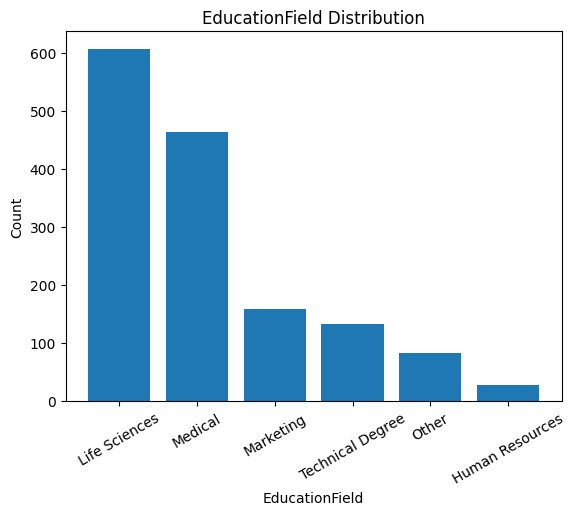

In [62]:
# EducationField 막대 그래프 그리기

# 각 카테고리의 개수를 계산
EducationField_counts = employee_data['EducationField'].value_counts()

# 막대 그래프 생성
plt.bar(EducationField_counts.index, EducationField_counts.values)
plt.xlabel('EducationField')
plt.ylabel('Count')
plt.title('EducationField Distribution')
plt.xticks(rotation=30)
plt.show()

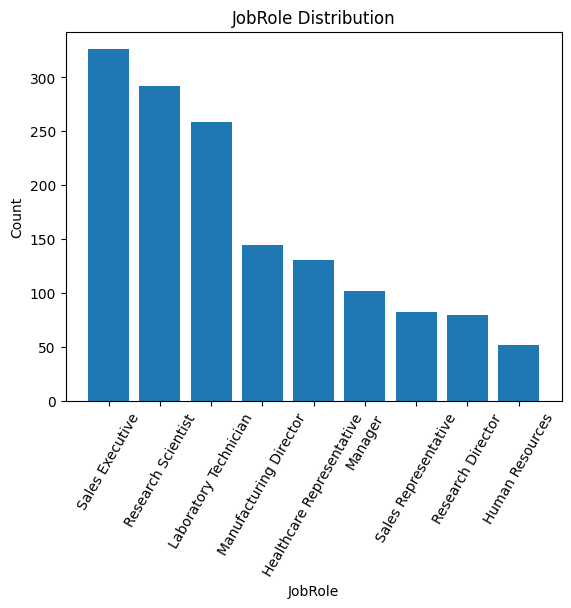

In [63]:
# JobRole 막대 그래프 그리기

# 각 카테고리의 개수를 계산
JobRole_counts = employee_data['JobRole'].value_counts()

# 막대 그래프 생성
plt.bar(JobRole_counts.index, JobRole_counts.values)
plt.xlabel('JobRole')
plt.ylabel('Count')
plt.title('JobRole Distribution')
plt.xticks(rotation=60)
plt.show()

#### Attrition의 'Yes'와 'No'에 따라 다른 범주형 변수와의 관계를 살펴보기

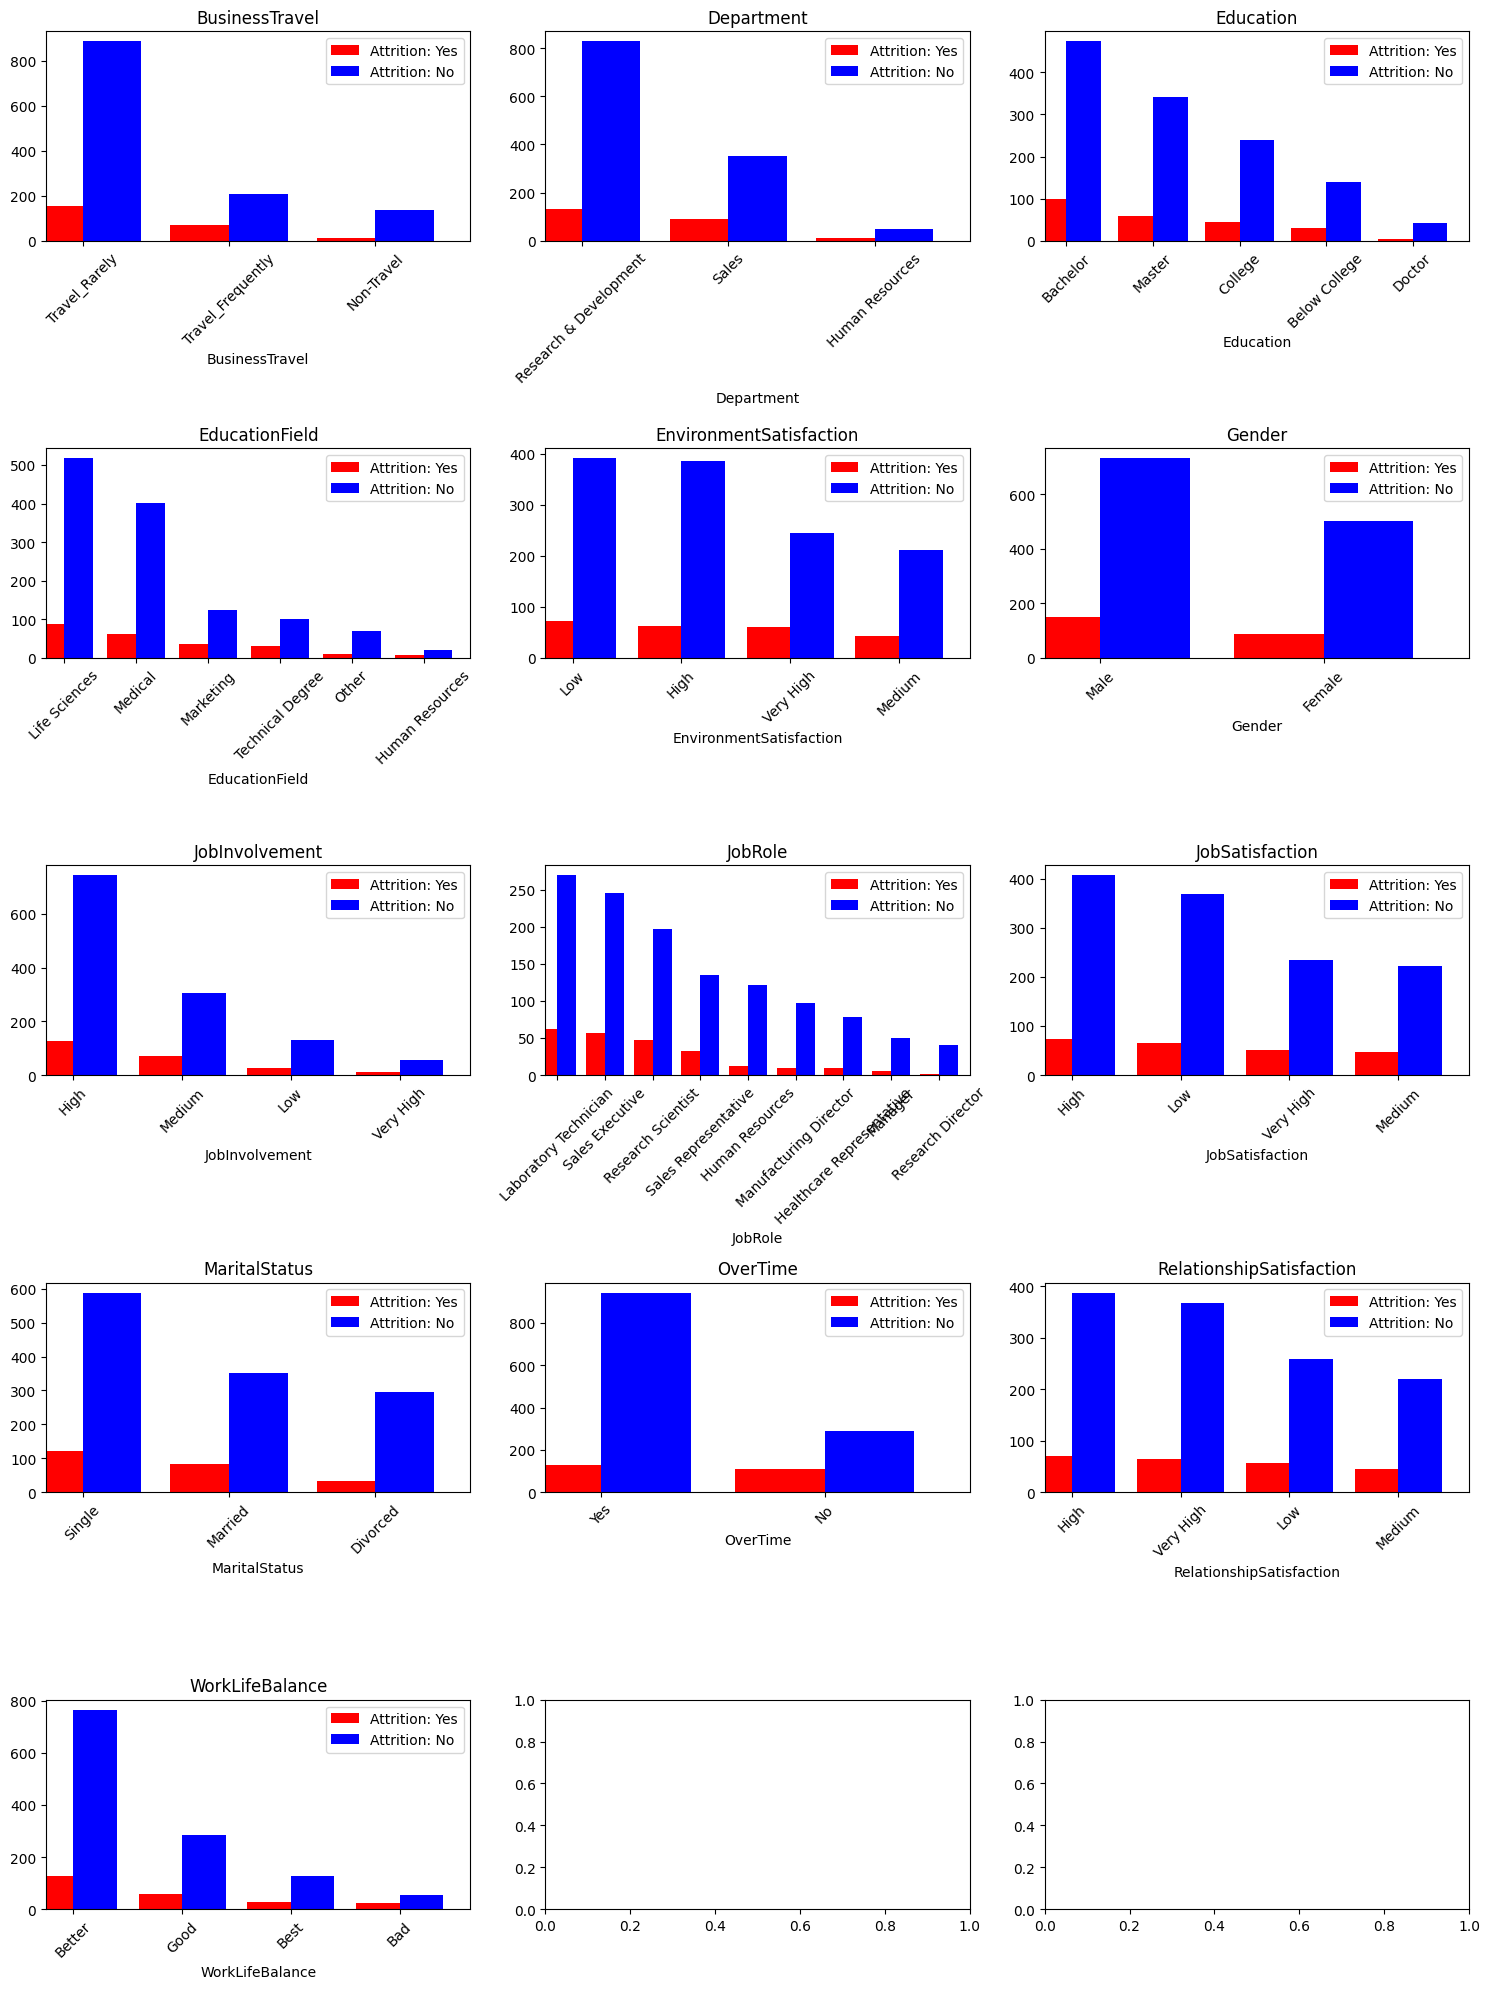

In [68]:
# Attrition이 'Yes'와 'No' 각각 필터링.
attrition_yes = employee_data_mapped[employee_data['Attrition'] == 'Yes']
attrition_no = employee_data_mapped[employee_data['Attrition'] == 'No']

# 분석할 카테고리 변수 목록을 정의
categories = [
    'BusinessTravel', 'Department', 'Education', 'EducationField',
    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
    'JobSatisfaction', 'MaritalStatus', 'OverTime', 'RelationshipSatisfaction',
    'WorkLifeBalance'
]

# 5x3 그리드로 서브플롯 생성
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
ax = axes.ravel()

# 각 카테고리 변수에 대해 'Yes'와 'No'의 분포를 막대 그래프로 플로팅
for i, category in enumerate(categories):
    yes_counts = attrition_yes[category].value_counts()
    no_counts = attrition_no[category].value_counts()

    # 'Yes'와 'No'의 분포를 나란히 비교할 수 있도록 막대 그래프 생성
    yes_counts.plot(kind='bar', color='red', ax=ax[i], position=1, label='Attrition: Yes', width=0.4)
    no_counts.plot(kind='bar', color='blue', ax=ax[i], position=0, label='Attrition: No', width=0.4)

    ax[i].set_title(category)
    ax[i].set_xticklabels(yes_counts.index, rotation=45)
    ax[i].legend()

# 서브플롯 간 간격을 자동으로 조정하여 레이아웃을 깔끔하게 맞춤
plt.tight_layout()




In [65]:
# 각 카테고리 변수에 대해 퇴사 여부가 Yes인 비율을 계산하여 출력

# 특정 카테고리별로 Attrition이 Yes인 비율을 계산하여 출력하는 함수
def attrition_yes_ratio(data, category):
    # 지정된 카테고리와 Attrition을 기준으로 그룹화하여 각 그룹의 수를 계산
    attrition_counts = data.groupby([category, "Attrition"]).size().unstack()

    # Attrition이 Yes인 비율을 계산하여 출력
    print(attrition_counts["Yes"] / attrition_counts.sum(axis=1))

categories = [
    'BusinessTravel', 'Department', 'Education', 'EducationField',
    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
    'JobSatisfaction', 'MaritalStatus', 'OverTime', 'RelationshipSatisfaction',
    'WorkLifeBalance'
]

# 각 카테고리에 대해 Attrition이 Yes인 비율을 계산하고 출력
for category in categories:
    attrition_yes_ratio(employee_data_mapped, category)
    print("--------------------------------------------")

BusinessTravel
Non-Travel           0.080000
Travel_Frequently    0.249097
Travel_Rarely        0.149569
dtype: float64
--------------------------------------------
Department
Human Resources           0.190476
Research & Development    0.138398
Sales                     0.206278
dtype: float64
--------------------------------------------
Education
Bachelor         0.173077
Below College    0.182353
College          0.156028
Doctor           0.104167
Master           0.145729
dtype: float64
--------------------------------------------
EducationField
Human Resources     0.259259
Life Sciences       0.146865
Marketing           0.220126
Medical             0.135776
Other               0.134146
Technical Degree    0.242424
dtype: float64
--------------------------------------------
EnvironmentSatisfaction
High         0.136865
Low          0.253521
Medium       0.149826
Very High    0.134529
dtype: float64
--------------------------------------------
Gender
Female    0.147959
Male      0.